
# Lasso和Elastic Net(弹性网络)

>翻译者:[@Loopy](https://github.com/loopyme)        
>校验者:[@barrycg](https://github.com/barrycg)

使用坐标下降实现Lasso和Elastic Net(弹性网络)(L1和L2罚项)。

回归系数可以被强制设定为正。


In [ ]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

In [ ]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X /= X.std(axis=0)  # 标准化数据(使得l1_ratio参数更容易被设置)

In [ ]:
# 计算路径

eps = 5e-3  # 它越小，路径就越长

print("使用lasso计算正则化路径...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("使用系数强制为正的lasso计算正则化路径...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps, positive=True, fit_intercept=False)

print("使用Elastic Net计算正则化路径...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("使用系数强制为正的Elastic Net计算正则化路径...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

    使用lasso计算正则化路径...
    使用系数强制为正的lasso计算正则化路径...
    使用Elastic Net计算正则化路径...
    使用系数强制为正的Elastic Net计算正则化路径...



In [ ]:
# 输出结果

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('系数')
plt.title('Lasso和Elastic-Net的路径')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')





    (-1.8715612353951188,
     0.7661727741441225,
     -14.885251328819376,
     28.52127146246762)




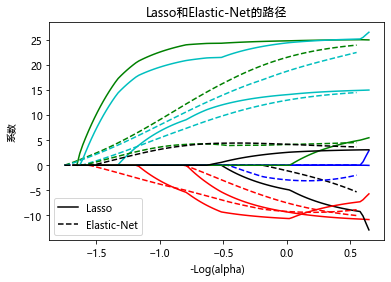



In [ ]:
plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('系数')
plt.title('Lasso和系数强制为正的lasso的路径')
plt.legend((l1[-1], l2[-1]), ('Lasso', '系数强制为正的Lasso'), loc='lower left')
plt.axis('tight')





    (-1.7698057217366594,
     0.7613272734937198,
     -14.945497919817987,
     29.786449873438457)




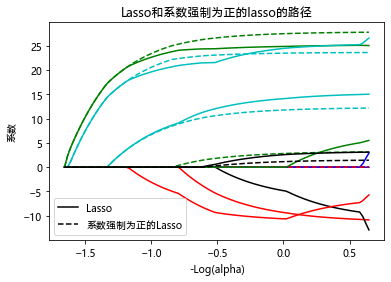



In [ ]:
plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('系数')
plt.title('Elastic-Net和系数强制为正的Elastic-Net的路径')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', '系数强制为正的Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

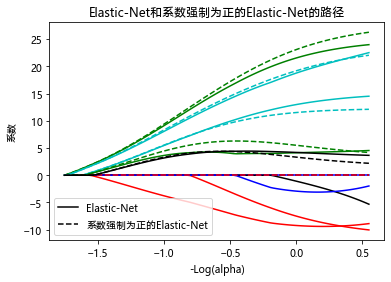